### 1. Data Preparation

#### a. Import Data

In [10]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [124]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,21202,Female,27.00,0,0,Yes,Private,Urban,80.57,39.80,smokes,0
1,113623,Male,63.82,0,1,Yes,Govt_job,Urban,74.19,28.79,Unknown,1
2,64489,Male,56.00,0,0,Yes,Govt_job,Rural,73.02,31.10,never smoked,0
3,70429,Female,33.00,0,0,Yes,Private,Urban,84.48,44.50,never smoked,0
4,163939,Female,78.95,0,1,Yes,Private,Rural,126.60,27.73,never smoked,1


#### b. Data Understanding

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4860 non-null   int64  
 1   gender             4860 non-null   object 
 2   age                4860 non-null   float64
 3   hypertension       4860 non-null   int64  
 4   heart_disease      4860 non-null   int64  
 5   ever_married       4860 non-null   object 
 6   work_type          4860 non-null   object 
 7   Residence_type     4860 non-null   object 
 8   avg_glucose_level  4860 non-null   float64
 9   bmi                4458 non-null   float64
 10  smoking_status     4860 non-null   object 
 11  stroke             4860 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 455.8+ KB


In [126]:
numbers = df.drop(columns='id').select_dtypes(include=['number']).columns
categories = df.select_dtypes(exclude=['number']).columns

In [127]:
round(df[numbers].describe(),2)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4860.00,4860.00,4860.00,4860.00,4458.00,4860.00
mean,52.29,0.15,0.11,115.61,29.26,0.40
std,22.94,0.36,0.31,53.65,7.27,0.49
min,0.08,0.00,0.00,55.12,11.30,0.00
25%,37.00,0.00,0.00,77.92,24.20,0.00
50%,56.98,0.00,0.00,95.09,28.48,0.00
75%,72.05,0.00,0.00,131.48,32.98,1.00
max,82.24,1.00,1.00,272.24,78.00,1.00


In [128]:
df[categories].describe()

,gender,ever_married,work_type,Residence_type,smoking_status
count,4860,4860,4860,4860,4860
unique,2,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2865,3593,2834,2525,1823


#### c. Handle Missing Value & Duplicated

In [129]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  402
smoking_status         0
stroke                 0
dtype: int64

In [130]:
df.dropna(inplace=True)

In [131]:
df.duplicated().sum()

np.int64(0)

#### d. Feature Engineering

In [132]:
#1. Age Category (Kategori Usia)
df['age_category'] = df['age'].apply(
    lambda age: "1. Children" if age <= 18 else
                "2. Young Adult" if age <= 35 else
                "3. Adult" if age <= 55 else
                "4. Senior" if age <= 75 else
                "5. Elderly"
)

In [133]:
#2. BMI Category (WHO Standard)
df["bmi_category"] = df["bmi"].apply(
    lambda bmi: "1. Underweight" if bmi < 18.5 else
                "2. Normal" if bmi < 25 else
                "3. Overweight" if bmi < 30 else
                "4. Obesity"
)

In [134]:
#3. Glucose Category (Prediabetes / Diabetes)
df["glucose_category"] = df["avg_glucose_level"].apply(
    lambda g: "1. Normal" if g < 100 else
              "2. Prediabetes" if g < 126 else
              "3. Diabetes"
)

In [135]:
#4. Chronic Condition Count (Jumlah Penyakit Kronis)
df["chronic_count"] = (
    df["hypertension"] 
    + df["heart_disease"] 
    + (df["avg_glucose_level"] >= 126).astype(int)
)

In [136]:
#5. Risk Score (Fitur Komposit Risiko Stroke)
df["risk_score"] = (
    df["hypertension"] +
    df["heart_disease"] +
    (df["age"] > 55).astype(int) +
    (df["avg_glucose_level"] >= 126).astype(int)
)

In [137]:
#6. Lifestyle Risk Level
df["lifestyle_risk"] = df.apply(
    lambda row: "3. High Risk" if (row["smoking_status"] == "smokes" and row["bmi_category"] == "Obesity") else
                "2. Medium Risk" if (row["smoking_status"] == "smokes" or row["bmi_category"] == "Overweight") else
                "1. Low Risk",
    axis=1
)


In [138]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_category,bmi_category,glucose_category,chronic_count,risk_score,lifestyle_risk
0,21202,Female,27.00,0,0,Yes,Private,Urban,80.57,39.80,smokes,0,2. Young Adult,4. Obesity,1. Normal,0,0,2. Medium Risk
1,113623,Male,63.82,0,1,Yes,Govt_job,Urban,74.19,28.79,Unknown,1,4. Senior,3. Overweight,1. Normal,1,2,1. Low Risk
2,64489,Male,56.00,0,0,Yes,Govt_job,Rural,73.02,31.10,never smoked,0,4. Senior,4. Obesity,1. Normal,0,1,1. Low Risk
3,70429,Female,33.00,0,0,Yes,Private,Urban,84.48,44.50,never smoked,0,2. Young Adult,4. Obesity,1. Normal,0,0,1. Low Risk
4,163939,Female,78.95,0,1,Yes,Private,Rural,126.60,27.73,never smoked,1,5. Elderly,3. Overweight,3. Diabetes,2,3,1. Low Risk


#### e. Save to Excel

In [139]:
df.to_excel('healthcare-dataset-stroke-data.xlsx', index=False)

#### f. Handle Outlier

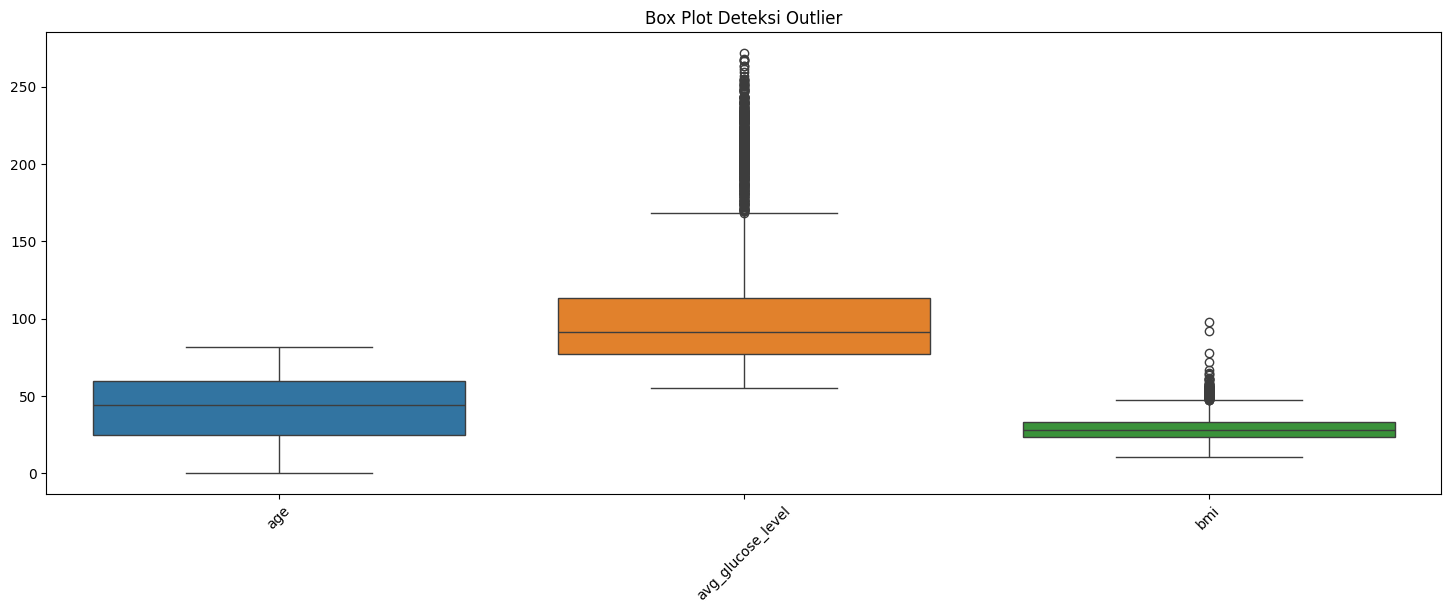

In [18]:
plt.figure(figsize=(18, 6))
sns.boxplot(data=df[numbers])
plt.title("Box Plot Deteksi Outlier")
plt.xticks(rotation=45)
plt.show()

In [19]:
# Hitung Q1, Q3, dan IQR untuk kolom numerik
Q1 = df[numbers].quantile(0.25)
Q3 = df[numbers].quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Data sebelum: ", df.shape[0], "baris")

# Hapus baris yang memiliki outlier di salah satu kolom numerik
df = df[~((df[numbers] < lower_bound) | (df[numbers] > upper_bound)).any(axis=1)]

print("Data sesudah: ", df.shape[0], "baris")

Data sebelum:  4909 baris
Data sesudah:  4260 baris


### 2. Pemilihan Feature

#### a. Pemisahan Variabel Target dan Feature

In [42]:
df_select = df.copy()
df_select.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_category,bmi_category,glucose_category,chronic_count,risk_score,lifestyle_risk
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,5. Elderly,4. Obesity,2. Prediabetes,1,2,1. Low Risk
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1,4. Senior,3. Overweight,1. Normal,2,3,1. Low Risk
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1,4. Senior,2. Normal,1. Normal,0,1,1. Low Risk
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1,5. Elderly,2. Normal,1. Normal,0,1,1. Low Risk
10,12109,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1,5. Elderly,3. Overweight,1. Normal,1,2,1. Low Risk


In [43]:
#Memisahkan variabel bebas (x) dan terikat (y)
numbers = df_select.drop(columns=['id','stroke', 'hypertension',
                                  'heart_disease', 'chronic_count',
                                  'risk_score']).select_dtypes(include=['number']).columns
categories = df.select_dtypes(exclude=['number']).columns

#### a. Unvariat Analysis

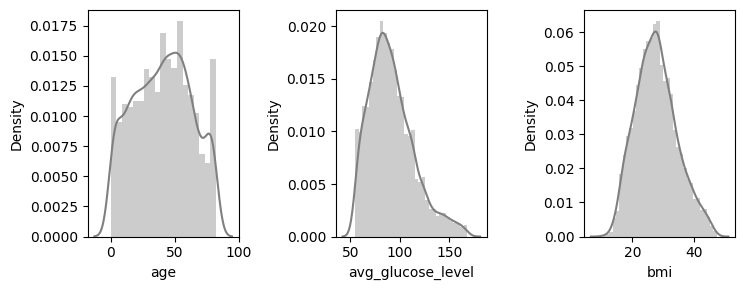

In [49]:
#Visualisasi Hasil Normalisasi dengan Density Plot
plt.figure(figsize=(15, 3))
for i in range(0, len(numbers)):
    plt.subplot(math.ceil(len(numbers)/6), 6, i+1)
    sns.distplot(df_select[numbers[i]], color='gray')
    plt.tight_layout()

#### b. Bivariate Analysis

<Axes: >

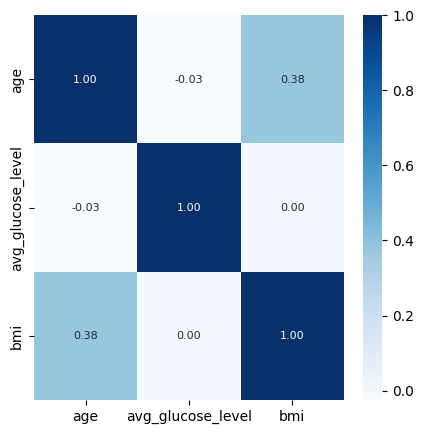

In [45]:
# Correlation Heatmap untuk melihat korelasi linear antara kolom-kolom numerik
plt.figure(figsize=(5,5))
sns.heatmap(df_select[numbers].corr(), cmap='Blues', annot=True, fmt='.2f', annot_kws={"size": 8})

#### c. Pemisahan Feature

In [46]:
#Memisahkan variabel bebas (x) dan terikat (y)
X = df_select.drop(['id',"stroke"], axis=1)
y = df_select["stroke"]

In [47]:
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,age_category,bmi_category,glucose_category,chronic_count,risk_score,lifestyle_risk
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,5. Elderly,4. Obesity,2. Prediabetes,1,2,1. Low Risk
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,4. Senior,3. Overweight,1. Normal,2,3,1. Low Risk
7,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,4. Senior,2. Normal,1. Normal,0,1,1. Low Risk
9,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,5. Elderly,2. Normal,1. Normal,0,1,1. Low Risk
10,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,5. Elderly,3. Overweight,1. Normal,1,2,1. Low Risk


In [48]:
y.head()

2     1
6     1
7     1
9     1
10    1
Name: stroke, dtype: int64

### 3. Normalisasi Data & Encoding

In [27]:
#Normalisasi kolom numerik dengan MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
for col in numbers:
    df_select[col] = MinMaxScaler().fit_transform(df_select[col].values.reshape(len(df_select), 1))

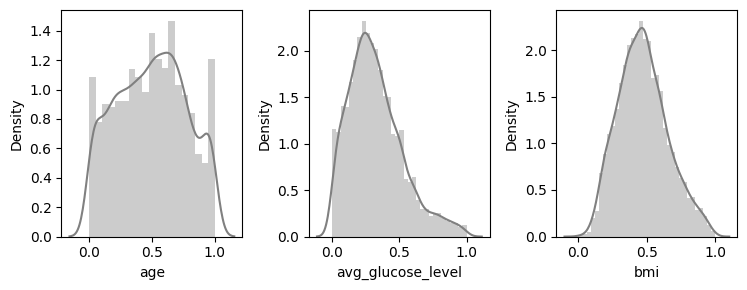

In [28]:
#Unvariat Analysis dengan Density Plot

plt.figure(figsize=(15, 3))
for i in range(0, len(df_select[numbers].columns)):
    plt.subplot(math.ceil(len(df_select[numbers].columns)/6), 6, i+1)
    sns.distplot(df_select[numbers].iloc[:, i], color='gray')
    plt.tight_layout()

In [29]:
df_select.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_category,bmi_category,glucose_category,chronic_count,risk_score,lifestyle_risk
2,31112,Male,0.975586,0,1,Yes,Private,Rural,0.449438,0.596774,never smoked,1,5. Elderly,4. Obesity,2. Prediabetes,1,2,1. Low Risk
6,53882,Male,0.902344,1,1,Yes,Private,Rural,0.132443,0.459677,never smoked,1,4. Senior,3. Overweight,1. Normal,2,3,1. Low Risk
7,10434,Female,0.841309,0,0,No,Private,Urban,0.347430,0.336022,never smoked,1,4. Senior,2. Normal,1. Normal,0,1,1. Low Risk
9,60491,Female,0.951172,0,0,Yes,Private,Urban,0.030523,0.373656,Unknown,1,5. Elderly,2. Normal,1. Normal,0,1,1. Low Risk
10,12109,Female,0.987793,1,0,Yes,Private,Rural,0.223923,0.521505,never smoked,1,5. Elderly,3. Overweight,1. Normal,1,2,1. Low Risk


In [30]:
#One-Hot Encoding
df_select = pd.get_dummies(df_select, columns=categories)
df_select.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,chronic_count,risk_score,gender_Female,...,age_category_5. Elderly,bmi_category_1. Underweight,bmi_category_2. Normal,bmi_category_3. Overweight,bmi_category_4. Obesity,glucose_category_1. Normal,glucose_category_2. Prediabetes,glucose_category_3. Diabetes,lifestyle_risk_1. Low Risk,lifestyle_risk_2. Medium Risk
2,31112,0.975586,0,1,0.449438,0.596774,1,1,2,False,...,True,False,False,False,True,False,True,False,True,False
6,53882,0.902344,1,1,0.132443,0.459677,1,2,3,False,...,False,False,False,True,False,True,False,False,True,False
7,10434,0.841309,0,0,0.347430,0.336022,1,0,1,True,...,False,False,True,False,False,True,False,False,True,False
9,60491,0.951172,0,0,0.030523,0.373656,1,0,1,True,...,True,False,True,False,False,True,False,False,True,False
10,12109,0.987793,1,0,0.223923,0.521505,1,1,2,True,...,True,False,False,True,False,True,False,False,True,False


In [40]:
y = df["stroke"]
y.value_counts()

stroke
0    4124
1     136
Name: count, dtype: int64

In [41]:
# pip install imbalanced-learn   # jika belum terpasang
from imblearn.over_sampling import SMOTE

# 1. one-hot encode categorical (jika ada)
X_enc = pd.get_dummies(X, drop_first=True)

# 2. isi NaN bila ada
X_enc = X_enc.fillna(X_enc.mean())

# 3. pastikan y 1D
y_arr = y.values.ravel() if hasattr(y, 'values') else np.ravel(y)

# 4. apply SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_enc, y_arr)

# 5. quick check
print('Before:', dict(pd.Series(y_arr).value_counts()))
print('After :', dict(pd.Series(y_res).value_counts()))

Before: {0: np.int64(4124), 1: np.int64(136)}
After : {1: np.int64(4124), 0: np.int64(4124)}
